# TASK 5
## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_USA=pd.read_csv('C:/Users/hp/Downloads/US_Accidents_Dec21_updated.csv')

In [4]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df_USA.dtypes.value_counts()

object     20
float64    13
bool       13
int64       1
Name: count, dtype: int64

- Shows the total 20 String, 13 Float, 13 Boolean, and 1 Integer type columns.

**Shape of original data** 

In [7]:
df_USA.shape 

(2845342, 47)

- num_col=df.select_dtypes('number')
- cat_col=df.select_dtypes('object')
- bool_col=df.select_dtypes('bool')
- float_col=df.select_dtypes('float64')
- float_col=df.select_dtypes('int64')

- missing_data = df.isna().sum(axis=0).sort_values(ascending=True)
- missing_data = missing_data.to_frame()
- missing_data.columns = ['missing_count']
- missing_data = missing_data.loc[missing_data['missing_count']>0]

In [8]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [9]:
df_USA.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

Unique states. 

In [10]:
df1=df_USA[df_USA['State']=='CA']

In [11]:
df1['IDD'] = df1['ID'].str.extractall('(\d+)')[0].groupby(level=0).sum().astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_11804\186785188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IDD'] = df1['ID'].str.extractall('(\d+)')[0].groupby(level=0).sum().astype(int)


- **str.extractall('(\d+)'):** This method is used to extract all occurrences of the pattern specified in the parentheses (\d+) from each element in the ID column.
- **[0]:** This is used to select the first (and only) capture group from the extracted matches.
- **groupby(level=0):** The multi-index first level (the original row index) is used to group the values.
- **astype(int):** This converts the concatenated string of digits back to an integer.

In [12]:
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2845338
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2845339
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,Day,Day,Day,Day,2845340
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2845341


In [13]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993


In [14]:
df1.shape

(795868, 48)

In [15]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [16]:
df1.duplicated().sum()

0

- There are no duplicate data

In [17]:
df1=df1.dropna(subset=['Precipitation(in)'])    

- Delete the Precipitation(in) column because it contains too many null values.

In [18]:
df1.shape

(625445, 48)

In [19]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

- Remove rows where any of the specified columns have missing values (NaN).

In [20]:
df1.shape

(604509, 48)

In [21]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   64.326089
Street                    0.000000
Side                      0.000000
City                      0.000993
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [22]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

- Remove rows where any of the specified columns have missing values (NaN).

In [23]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   64.328006
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [24]:
df1['Weather_Condition'].value_counts()

Weather_Condition
Fair                       359062
Cloudy                      71765
Mostly Cloudy               47895
Partly Cloudy               38994
Haze                        22902
Light Rain                  21552
Fog                         13841
Rain                         7615
Fair / Windy                 5031
Smoke                        4459
Heavy Rain                   3218
Light Snow                   1110
Cloudy / Windy                885
Mostly Cloudy / Windy         746
Partly Cloudy / Windy         711
Light Rain / Windy            686
Snow                          431
Rain / Windy                  423
Light Drizzle                 342
Drizzle                       338
Heavy Rain / Windy            284
Heavy Snow                    194
Thunder in the Vicinity       190
Shallow Fog                   186
Patches of Fog                172
Haze / Windy                  168
T-Storm                       167
Mist                          123
Fog / Windy                   

In [25]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [26]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [27]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,604477
1,Start_Time,412809
2,End_Time,519337
3,Description,241782
4,Street,34213
5,Side,2
6,City,1040
7,County,58
8,State,1
9,Zipcode,64668


num_col=df.select_dtypes('number')
cat_col=df.select_dtypes('object')
bool_col=df.select_dtypes('bool')
float_col=df.select_dtypes('float64')
int_col=df.select_dtypes('int64')


In [28]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [29]:
del df1['Airport_Code']

In [30]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [31]:
len(df_num.columns)

15

In [32]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [33]:
len(df1['City'].unique())

1040

## Numeric Data

In [34]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,208545
2,Start_Lng,211968
3,End_Lat,208319
4,End_Lng,211921
5,Distance(mi),7823
6,Number,27559
7,Temperature(F),137
8,Wind_Chill(F),215
9,Humidity(%),100


<Axes: >

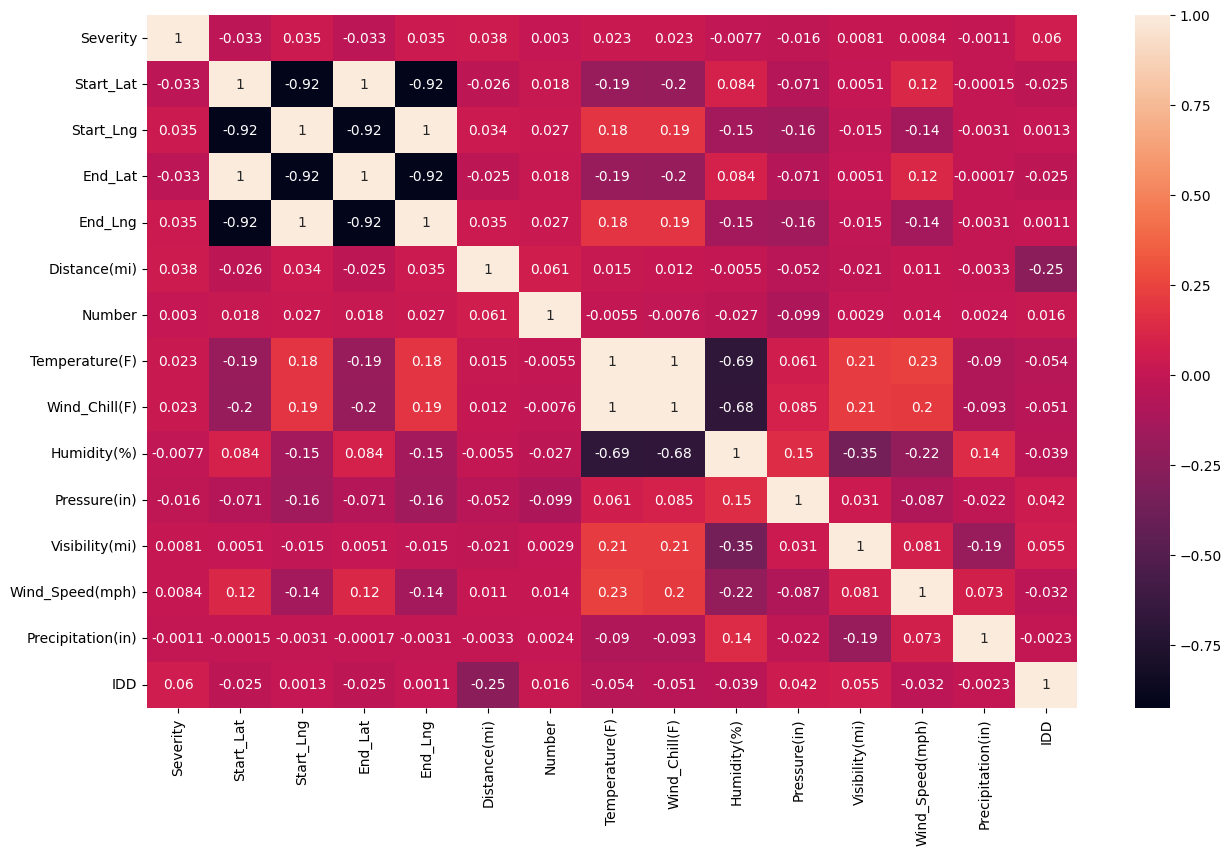

In [35]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

### Analysis of the Heatmap

**Severity Correlations**
- Severity has very weak correlations with all other variables. 
- The highest correlation is with IDD (0.056) and Distance(mi) (0.04), but these values are still quite low.

**Latitude and Longitude**
- Start_Lat and End_Lat have a perfect positive correlation (1.0), indicating that these values are identical or very closely related.
- Similarly, Start_Lng and End_Lng also have a perfect positive correlation (1.0).

**Temperature and Wind Chill**
- Temperature(F) and Wind_Chill(F) have a strong positive correlation (0.99), which is expected since wind chill is derived from the temperature.

**Humidity and Pressure**
- Humidity(%) has a moderate negative correlation with Pressure(in) (-0.35), indicating that as pressure increases, humidity tends to decrease.

**Temperature and Humidity**
- There is a moderate negative correlation between Temperature(F) and Humidity(%) (-0.69), suggesting that higher temperatures are associated with lower humidity levels.

**Distance**
- Distance(mi) has very low correlations with all other variables. 
- The highest is with IDD (-0.26), but this is still considered a weak correlation.

**Other Correlations**
- Visibility(mi) has a small positive correlation with IDD (0.056).
- Wind_Speed(mph) has a slight positive correlation with IDD (0.073).
- Precipitation(in) has very weak or negligible correlations with other variables.

In [36]:
cities = df1['City'].unique()
len(cities)

1040

In [37]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Los Angeles                       56471
San Diego                         21999
Sacramento                        17708
Bakersfield                       11504
Riverside                         10943
                                  ...  
Anaheim-Santa Ana-Garden Grove        1
Dillon Beach                          1
Nipton                                1
Playa Del Rey                         1
Canyon Lake                           1
Name: count, Length: 1040, dtype: int64

In [38]:
#top 10 cities by number of accident
accidents_by_cities[:10]

City
Los Angeles       56471
San Diego         21999
Sacramento        17708
Bakersfield       11504
Riverside         10943
San Bernardino     9827
Anaheim            8652
Fresno             8624
Ontario            8601
Oakland            7153
Name: count, dtype: int64

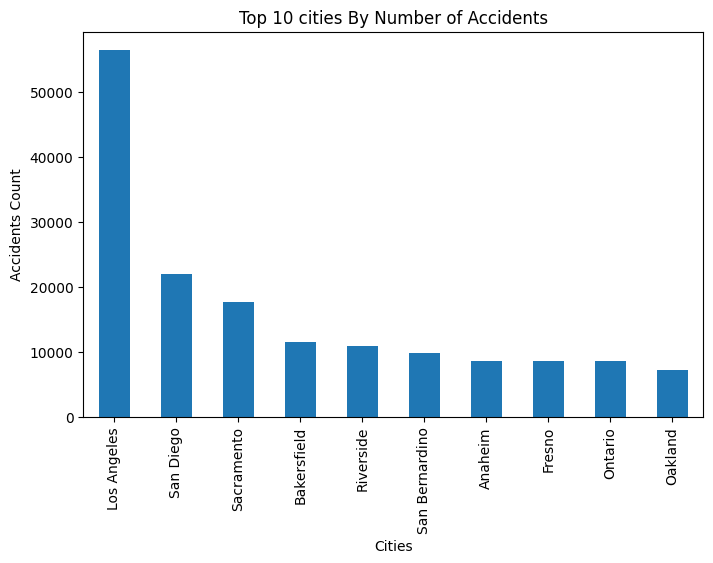

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

### Analysis of the Bar Chart

**Dominance of Los Angeles**
- Los Angeles has the highest number of accidents by a significant margin, with over 50,000 accidents.
- This suggests that it is a major hotspot for traffic accidents.

**Top Three Cities**
- The top three cities by number of accidents are Los Angeles, Sacramento, and San Diego, in that order.
- Sacramento and San Diego have a substantially lower number of accidents compared to Los Angeles but still significantly more than the remaining cities.

**Distribution of Accidents**
- The distribution shows a steep drop from Los Angeles to Sacramento and San Diego.
- The number of accidents in the fourth-ranked city (Bakersfield) is significantly lower than in San Diego.

**Cities with Similar Accident Counts**
- The cities ranked from fourth to tenth (Bakersfield, Riverside, San Jose, San Bernardino, Anaheim, Fresno, and Ontario) have relatively similar accident counts, with numbers ranging between approximately 8,000 to 15,000 accidents.

**Implications**
- The high number of accidents in Los Angeles could be attributed to its large population, extensive road network, and heavy traffic congestion.
- Other cities with high accident counts may also have similar contributing factors like high population density and busy roadways.

In [40]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1      4189
2    590705
3      5550
4      4033
Name: ID, dtype: int64

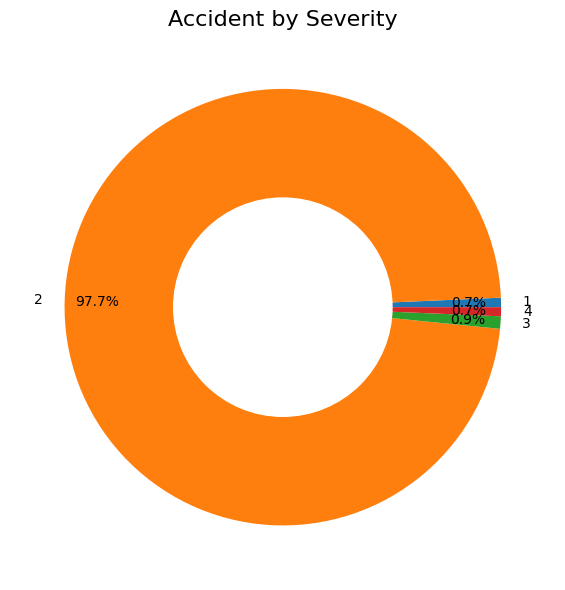

In [41]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label, autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

### Analysis of the Donut Chart

**Severity Distribution**
- The vast majority of accidents (97.6%) are of severity level 2. This indicates that most accidents are likely moderate in nature.
- Severity levels 1, 3, and 4 account for a very small percentage of the total accidents:
- **Severity level 1:** 0.7%
- **Severity level 3:** 1.0%
- **Severity level 4:** 0.7%

**Implications**
- The dominance of severity level 2 suggests that while accidents are frequent, they typically do not result in the most extreme outcomes (neither minor nor very severe).
- The low percentage of severity level 1 accidents might indicate that minor accidents are either less reported or less frequent.
- Similarly, the low percentages for severity levels 3 and 4 indicate that more severe accidents are relatively rare compared to moderate accidents.

**Visual Clarity**
- The donut chart effectively highlights the overwhelming prevalence of severity level 2 accidents, making it clear that this is the most common severity level by a large margin.
- The use of different colors for each severity level aids in distinguishing between the categories, although the small slices for severity levels 1, 3, and 4 are harder to see due to their low percentages.

In [42]:
# Check the data type of the 'Start_Time' column
df1['Start_Time'].dtypes

dtype('O')

In [43]:
# Check the data type of the 'End_Time' column
df1['End_Time'].dtypes

dtype('O')

In [44]:
# df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})

df1['Start_Time'] = pd.to_datetime(df1['Start_Time'], errors='coerce')
df1['End_Time'] = pd.to_datetime(df1['End_Time'], errors='coerce')
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [45]:
df1['Start_Time'][2408]

Timestamp('2016-04-22 12:54:44')

In [46]:
df1['End_Time'][2408]

Timestamp('2016-04-22 18:54:44')

In [47]:
df1['start_date'] = df1['Start_Time'].dt.date
df1['start_time'] = df1['Start_Time'].dt.time

In [48]:
df1['end_date'] = df1['End_Time'].dt.date
df1['end_time'] = df1['End_Time'].dt.time

In [49]:
df1['end_time']

2082       03:36:16
2408       18:54:44
2410       18:53:26
2476       21:55:19
3091       19:07:53
             ...   
2845337    18:32:01
2845338    19:38:23
2845339    19:28:49
2845340    19:29:42
2845341    19:21:31
Name: end_time, Length: 604477, dtype: object

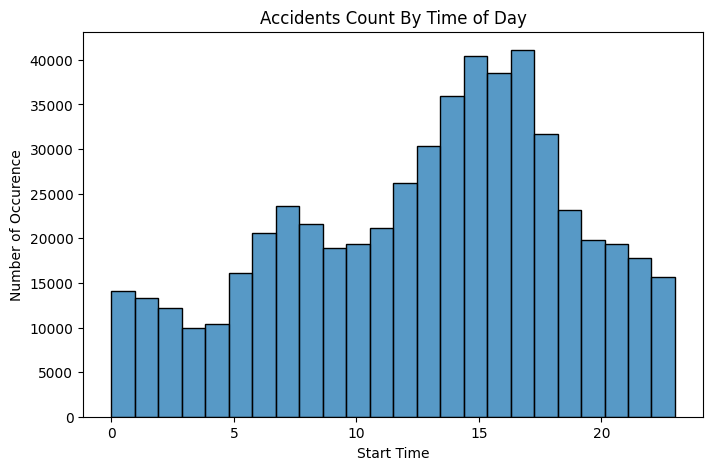

In [50]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')
plt.show()

### Analysis of the Histogram
The histogram shows the distribution of accident occurrences by the hour of the day.

**Peak Hours**
- The highest number of accidents occurs between 15:00 (3 PM) and 17:00 (5 PM). This peak can be attributed to the evening rush hour when many people are driving home from work.
- Another noticeable peak is around 8:00 (8 AM), which coincides with the morning rush hour.

**Low Accident Hours**
- The number of accidents is significantly lower during the early morning hours (midnight to around 5 AM). This makes sense as there is less traffic on the roads during these hours.
- There is also a decrease in accidents after 20:00 (8 PM), indicating reduced traffic in the late evening.

**Midday and Early Afternoon**
- There is a steady increase in accidents from around 5 AM, peaking around the mid-morning and remaining relatively high through the early afternoon before reaching the peak during the evening rush hour.

**Overall Trend**
- The histogram suggests that accident occurrence is closely linked to traffic patterns, with the busiest times of day corresponding to the highest number of accidents. This pattern is typical as higher traffic volumes increase the likelihood of accidents.

**Conclusion**
- The histogram effectively visualizes the distribution of accident occurrences by the time of day, highlighting the critical hours where interventions and traffic management could potentially reduce accidents. Understanding these patterns can help in planning better traffic control measures and public safety campaigns.

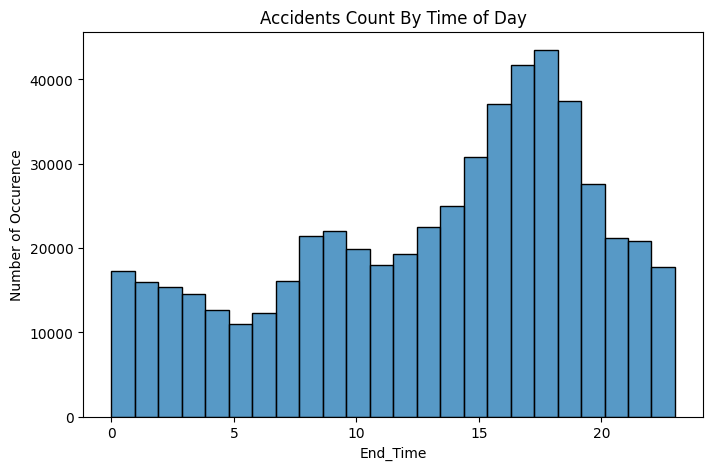

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['End_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')
plt.show()

### Analysis of the Histogram

**General Trend**
- There is a noticeable increase in the number of accidents starting from early morning (around 5-6 AM), peaking in the late afternoon (around 3-4 PM), and then gradually declining in the evening.

**Morning Hours (Midnight to 6 AM)**
- The number of accidents is relatively low during the early morning hours (midnight to 6 AM). This might be due to fewer vehicles on the road during these hours, leading to fewer accidents.

**Morning Rush (6 AM to 10 AM)**
- There is a steady increase in accidents during the morning rush hours. This can be attributed to the increase in traffic as people commute to work or school.

**Midday (10 AM to 2 PM)**
- The number of accidents remains fairly steady during midday hours. This period may involve less traffic congestion compared to rush hours but still has significant vehicular movement.

**Afternoon Peak (2 PM to 6 PM)**
- The highest number of accidents occurs in the late afternoon hours. This could be due to a combination of high traffic volumes as people return home from work and school, and potentially higher levels of fatigue or distraction.

**Evening (6 PM to Midnight)**
- After 6 PM, there is a gradual decline in the number of accidents. This decline continues into the late evening, potentially reflecting reduced traffic volumes as the night progresses.

**Possible Contributing Factors**
- **Rush Hours:** Increased traffic density during the morning and evening rush hours contributes to the higher incidence of accidents.
- **Driver Fatigue:** Fatigue could be a significant factor in the higher accident rates in the late afternoon.
- **Visibility:** Changes in visibility (dusk and nightfall) might also affect accident rates, particularly in the early morning and evening hours.

In [52]:
del df1['Start_Time']
del df1['End_Time']

In [53]:
#df.head()

In [54]:
%matplotlib inline
import os

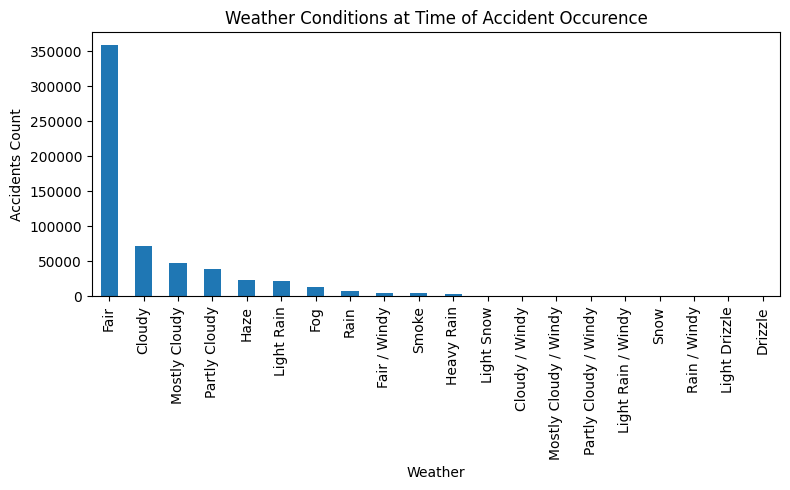

In [55]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions = df1['Weather_Condition'].value_counts()
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)
ax.set(title = 'Weather Conditions at Time of Accident Occurence', xlabel = 'Weather', ylabel = 'Accidents Count')
plt.tight_layout() 
plt.show()

### Chart Analysis
The bar chart visualizes the frequency of different weather conditions at the time of accidents.

**Dominant Weather Condition**
- The most common weather condition at the time of accidents is "Fair," with over 350,000 occurrences. This suggests that a significant number of accidents happen during clear weather conditions.

**Other Common Conditions**
- "Cloudy" is the second most common weather condition, followed by "Mostly Cloudy" and "Partly Cloudy." These conditions also have a relatively high number of accidents, though much lower than "Fair."
- "Haze" and "Light Rain" are also notable, indicating that reduced visibility and wet conditions contribute to accidents.

**Less Common Conditions**
- Conditions like "Fog," "Rain," "Fair / Windy," "Smoke," and "Heavy Rain" have fewer accidents but are still significant.
- The least common conditions in the top 20 include "Light Snow," "Cloudy / Windy," "Mostly Cloudy / Windy," "Partly Cloudy / Windy," "Light Rain / Windy," "Snow," "Rain / Windy," "Light Drizzle," and "Drizzle."

**Insights**
- The high number of accidents during "Fair" weather conditions might be due to higher traffic volumes or a false sense of security leading to less cautious driving.
- Cloudy and rainy conditions also contribute significantly to accidents, likely due to reduced visibility and slippery roads.
- Windy conditions, whether combined with other weather types or not, appear less frequently but still pose a risk.

**Conclusion**

**Clear Weather Risks**
- Despite being perceived as safer, fair weather conditions have the highest number of accidents. This might be attributed to higher traffic volumes and possibly a false sense of security leading to less vigilant driving behaviors.

**Impact of Visibility and Road Conditions**
- Cloudy and rainy conditions, which reduce visibility and create slippery roads, contribute to a significant number of accidents. These findings highlight the need for heightened awareness and cautious driving in such weather.

**Windy Conditions**
- Windy conditions, particularly when combined with other weather conditions (e.g., "Light Rain / Windy," "Cloudy / Windy"), also pose a risk but occur less frequently.

**Policy and Safety Measures**
- This information can be pivotal for traffic safety analysis and for developing strategies to mitigate accidents under different weather conditions. For instance, public awareness campaigns can be tailored to emphasize cautious driving not just during adverse weather but also in clear conditions.

###  Most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

In [56]:
df_num.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),IDD
2082,3,36.19790,-121.15137,36.198250,-121.14508,0.352,NaN,59.0,59.0,58.0,29.81,10.0,0.0,0.00,2083
2408,2,38.84685,-120.02881,38.825990,-120.02946,1.442,806.0,33.1,27.7,92.0,29.77,0.5,5.8,0.22,2409
2410,2,38.77640,-119.91890,38.851030,-120.02231,7.588,NaN,33.1,27.7,92.0,29.77,0.5,5.8,0.22,2411
2476,2,38.82653,-120.03011,38.832616,-120.03564,0.515,21111.0,46.0,43.1,54.0,29.87,10.0,5.8,0.00,2477
3091,2,35.55134,-121.07163,35.527180,-121.04482,2.249,NaN,71.0,71.0,53.0,29.75,10.0,16.0,0.00,3092


In [57]:
df1.shape

(604477, 46)

In [58]:
df_num.shape

(604477, 15)

In [59]:
# Accidents by order of severity (1 being lowest, and 4 being highest)
df1.groupby('Severity').count()['IDD']

Severity
1      4189
2    590705
3      5550
4      4033
Name: IDD, dtype: int64

<Axes: xlabel='Severity', ylabel='Start_Lat'>

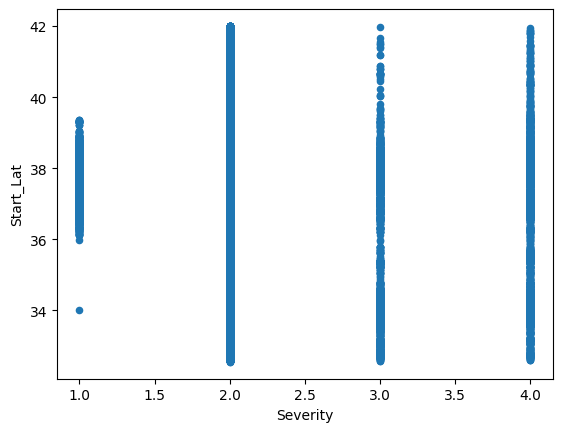

In [60]:
# scatter plot
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

### Analysis of the Scatter Plot

**X-axis (Severity)**
- The X-axis represents the severity of the accidents. Severity values range from 1 to 4, with 1 being the least severe and 4 being the most severe.

**Y-axis (Start_Lat)**
- The Y-axis represents the latitude where the accidents occurred.

**Distribution**
- The scatter plot shows the distribution of accident severities across different latitudes.
- There are distinct vertical clusters for each severity level, indicating the geographic spread of accidents for each severity category.

**Severity Levels**
- **Severity 1:** Accidents are concentrated in a narrow latitude range, mostly around 34-38 degrees.
- **Severity 2:** Accidents have a wider latitude range, roughly between 34-40 degrees.
- **Severity 3:** Accidents are more spread out in latitude, ranging from around 34 to 42 degrees.
- **Severity 4:** Accidents have a similar spread to severity 3 but appear slightly more concentrated in certain latitude ranges.

**Geographical Insights**
- Higher severity accidents (3 and 4) tend to occur across a broader range of latitudes compared to lower severity accidents (1 and 2).
- There may be specific regions (latitude bands) where higher severity accidents are more common.

**Possible Factors**
- The geographical distribution could be influenced by various factors such as population density, road conditions, traffic volume, and weather conditions in different regions.

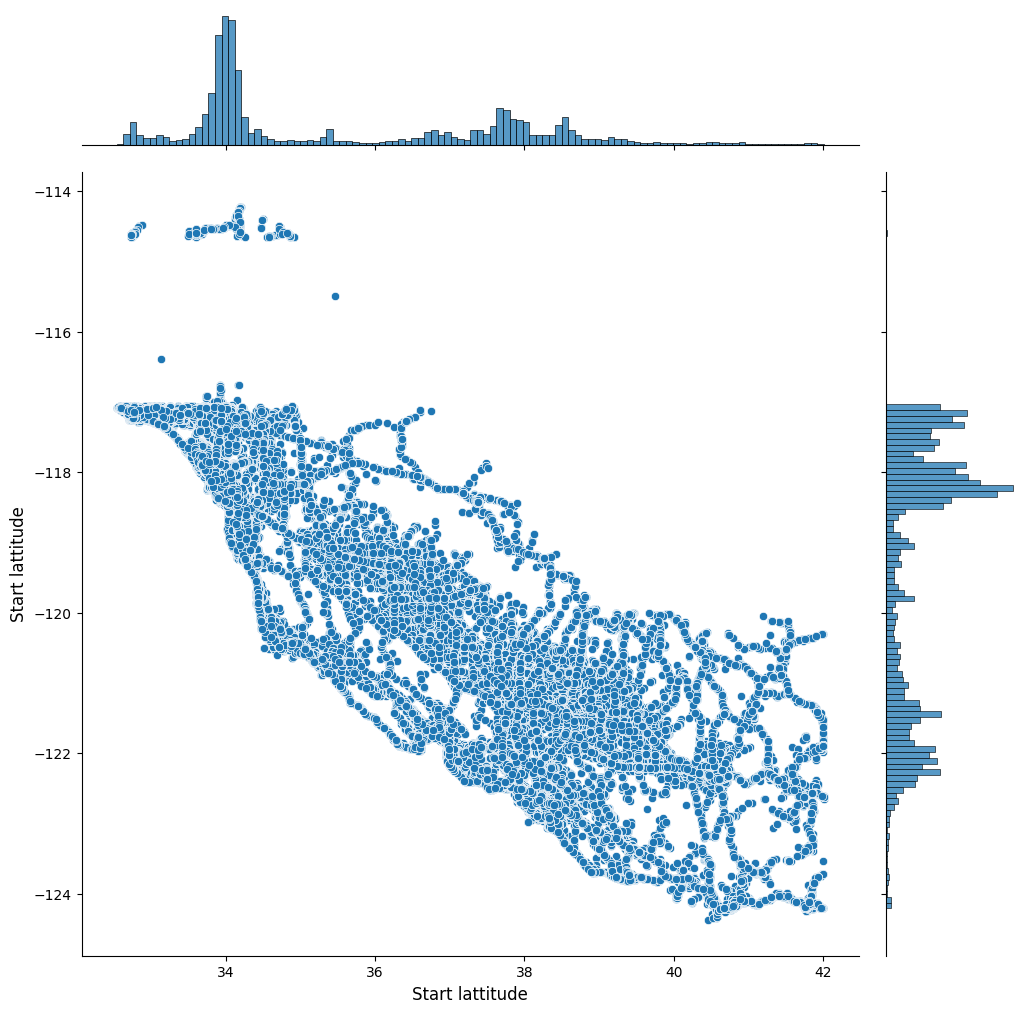

In [61]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

### Chart Analysis
The joint plot visualizes the relationship between the ending latitude (End_Lat) and ending longitude (End_Lng) of the data points.

**Geographical Distribution**
- The scatter plot shows a dense cluster of points, indicating a high concentration of data points in specific geographical regions.
- The distribution suggests that the data points are likely from a specific area, possibly a state or a region within a country. Given the context, it appears to be within the United States, likely California based on the latitude and longitude values.

**Density Plots**
- The histograms on the top and right sides of the plot show the distribution of End_Lat and End_Lng values, respectively.
- The latitude histogram shows a peak around 34-36 degrees, indicating a high concentration of data points in this latitude range.
- The longitude histogram shows a peak around -118 to -120 degrees, indicating a high concentration of data points in this longitude range.

**Insights**
- **Dense Clustering:** The dense clustering of points suggests that the majority of the data points are concentrated in a specific region, which could be an urban area or a region with high activity.
- **Distribution Spread:** The spread of points indicates that there are also data points spread across a wider geographical area, but with lower density. This suggests less frequent activity or a more rural spread.
- **Potential Urban Area:** The concentration in specific latitude and longitude ranges, combined with the overall shape, may correspond to a known urban area such as Los Angeles or the surrounding metropolitan regions in California.

**Conclusion**
- The joint plot provides valuable insights into the geographical distribution of the data points.
- The dense clustering in specific latitude and longitude ranges suggests a high concentration of activity in those regions.
- The histograms provide additional information about the distribution of the latitude and longitude values, highlighting the most common ranges.
- This information can be useful for geographical analysis and understanding the spatial distribution of the data points.
- It might help in identifying patterns related to human activity, transportation, or other location-based phenomena. the data points.

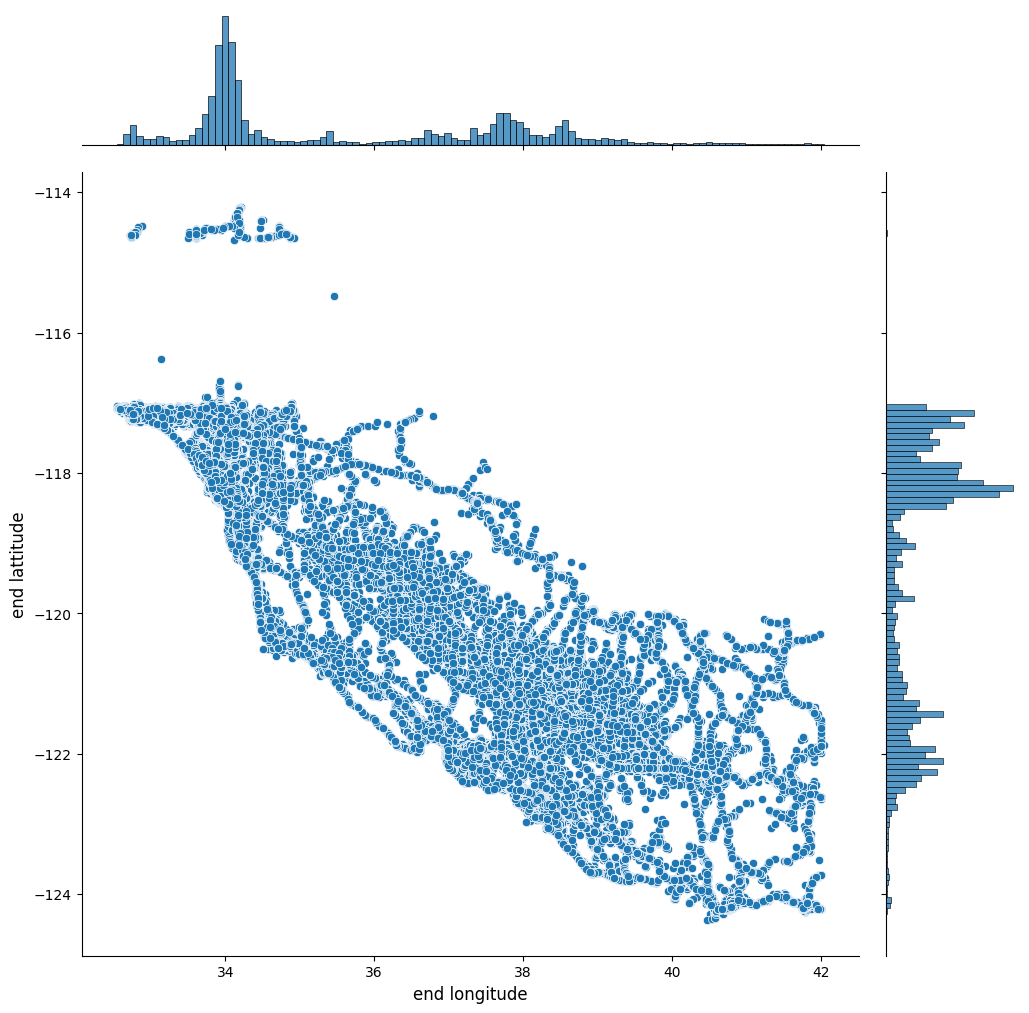

In [62]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

**Scatter Plot**
- The central plot shows a dense cloud of points, representing the geographical distribution of the latitude (End_Lat) and longitude (End_Lng) values.
- The pattern in the scatter plot suggests some form of spatial clustering, likely indicating a particular region where these data points are concentrated.

**Marginal Histograms**
- The histogram on the top represents the distribution of the End_Lat values.
- The histogram on the right represents the distribution of the End_Lng values.
- Both histograms provide a univariate view of the data, allowing you to see how latitude and longitude values are distributed independently.

### Analysis

- **Geographical Patterns:** The scatter plot reveals a clear geographical pattern. Given the coordinates, this looks like a region-specific plot (e.g., a state or a large city with a dense road network).

- **Clusters:** There are noticeable clusters of data points which might represent urban centers or highly trafficked areas.

**Latitude Distribution**
- The histogram shows a concentration of data points in the lower range of the latitude values, indicating that most end points are within a specific latitude band.

**Longitude Distribution**
- The histogram reveals a similar concentration in the longitude values, with a prominent peak around a certain range, suggesting a common longitude for many end points.
- **Overall Density:** The density of points decreases as you move away from the central clusters in the scatter plot. This indicates fewer end points in those regions, potentially rural areas or less frequented locations.